In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
ds = load_dataset("beanham/spatial_join_dataset")

README.md:   0%|          | 0.00/890 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

val-00000-of-00001.parquet:   0%|          | 0.00/254k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6442 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/716 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3069 [00:00<?, ? examples/s]

In [36]:
degrees=[1,2,5,10,20]
test=ds['test']
test_gt=np.array(ds['test']['label'])
heuristic_accuracy=[]
heuristic_fp=[]
heuristic_fn=[]
llama_accuracy=[]
llama_fp=[]
llama_fn=[]
for d in degrees:
    heuristis_pred=np.array(test['min_angle'])<=d
    llama_pred=np.load(f'llama3_degree_{d}.npy')
    llama_pred=np.array([int(i.replace('<|eot_id|>', '').split('Label:')[1].strip()) for i in llama_pred])

    ## accuracy
    heuristic_accuracy.append(accuracy_score(test_gt, heuristis_pred))
    llama_accuracy.append(accuracy_score(test_gt, llama_pred))

    ## fp & fn rave
    _,h_fp,h_fn,_=confusion_matrix(test_gt, heuristis_pred).ravel()
    _,l_fp,l_fn,_=confusion_matrix(test_gt, llama_pred).ravel()

    heuristic_fp.append(h_fp/len(test))
    heuristic_fn.append(h_fn/len(test))
    llama_fp.append(l_fp/len(test))
    llama_fn.append(l_fn/len(test))

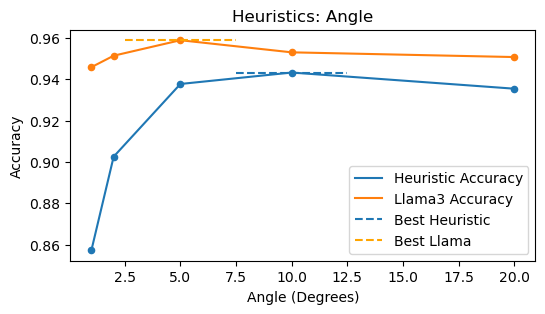

In [56]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_accuracy,label='Heuristic Accuracy')
plt.plot(degrees,llama_accuracy,label='Llama3 Accuracy')
plt.scatter(degrees, heuristic_accuracy,s=20)
plt.scatter(degrees, llama_accuracy,s=20)
plt.hlines(max(heuristic_accuracy), xmin=degrees[np.argmax(heuristic_accuracy)]-2.5, xmax=degrees[np.argmax(heuristic_accuracy)]+2.5, linestyle='dashed', label='Best Heuristic')
plt.hlines(max(llama_accuracy), xmin=degrees[np.argmax(llama_accuracy)]-2.5, xmax=degrees[np.argmax(llama_accuracy)]+2.5, linestyle='dashed', color='orange',label='Best Llama')
plt.title('Heuristics: Angle')
plt.ylabel('Accuracy')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass

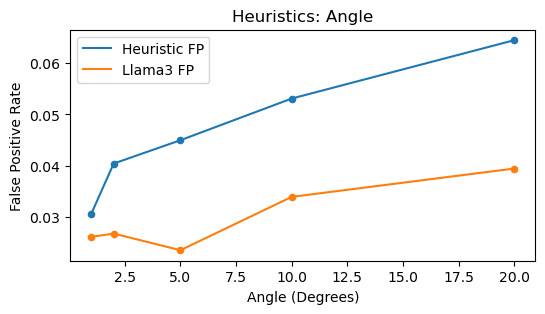

In [46]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_fp,label='Heuristic FP')
plt.plot(degrees,llama_fp,label='Llama3 FP')
plt.scatter(degrees, heuristic_fp,s=20)
plt.scatter(degrees, llama_fp,s=20)
plt.title('Heuristics: Angle')
plt.ylabel('False Positive Rate')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass

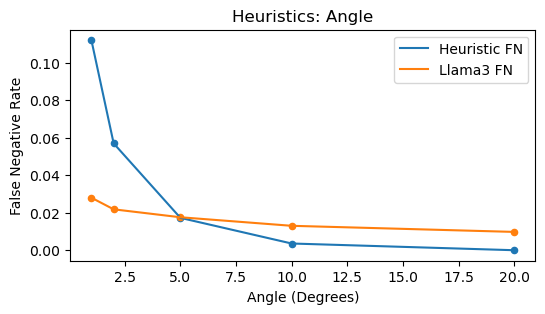

In [47]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_fn,label='Heuristic FN')
plt.plot(degrees,llama_fn,label='Llama3 FN')
plt.scatter(degrees, heuristic_fn,s=20)
plt.scatter(degrees, llama_fn,s=20)
plt.title('Heuristics: Angle')
plt.ylabel('False Negative Rate')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass